# imports

In [1]:
%load_ext autoreload
%autoreload 2
packages = !conda list
len(packages),packages

(455,
 ['# packages in environment at /Users/brucecottman/anaconda3:',
  '#',
  '# Name                    Version                   Build  Channel',
  '_anaconda_depends         2019.10                  py37_0  ',
  '_ipyw_jlab_nb_ext_conf    0.1.0                    py37_0  ',
  'absl-py                   0.7.0                    pypi_0    pypi',
  'alabaster                 0.7.12                   py37_0  ',
  'altair                    4.0.0                    pypi_0    pypi',
  'anaconda                  custom                   py37_1  ',
  'anaconda-client           1.7.2                    py37_0  ',
  'anaconda-navigator        1.9.6                    py37_0  ',
  'anaconda-project          0.8.2                    py37_0  ',
  'appdirs                   1.4.3                    pypi_0    pypi',
  'appnope                   0.1.0                    py37_0  ',
  'appscript                 1.0.1            py37h1de35cc_1  ',
  'argh                      0.26.2                 

## common imports

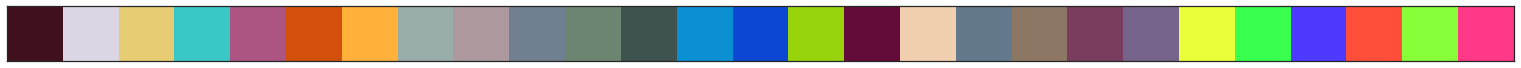

In [2]:
from __future__ import print_function
import matplotlib
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import sys, os
import io
from typing import Dict, Pattern

import seaborn as sns; sns.set()  # for plot styling
#set font size of labels on matplotlib plots
plt.rc('font', size=16)

#set style of plots
sns.set_style('white')

#define a custom palette
PALLET = ['#40111D', '#DCD5E4', '#E7CC74'
                 ,'#39C8C6', '#AC5583', '#D3500C'
                 ,'#FFB139', '#98ADA7', '#AD989E'
                 ,'#708090','#6C8570','#3E534D'

                 ,'#0B8FD3','#0B47D3','#96D30B'                 
                 ,'#630C3A','#F1D0AF','#64788B'                 
                 ,'#8B7764','#7A3C5D','#77648B'
                 ,'#eaff39','#39ff4e','#4e39ff'
                 ,'#ff4e39','#87ff39','#ff3987', ]
N_PALLET = len(PALLET)
sns.set_palette(PALLET)
sns.palplot(PALLET)

## finance imports

In [3]:
#!pip install pandas_datareader #if not already installed 
from pandas import to_datetime, DataFrame
from statistics import stdev
from pandas_datareader.data import DataReader
from math import inf
from pandas_datareader.data import DataReader
import copy
import plotly.express as px

## local imports

In [4]:
# add if you want to add google driveAssertionError
old__file__ = !pwd
__file__ =  old__file__  #!cd ../../NLP ;pwd
#__file__ = !pwd
#__file__ = '/gdrive/My Drive'

sys.path.append(__file__)
print(sys.path)
os.chdir(old__file__[0])
!pwd
__file__

['/Users/brucecottman/Documents/PROJECTS/FinMrkt/src', '/usr/local/Cellar/apache-spark/2.0.1/libexec/python', '/Users/brucecottman/Documents/PROJECTS/FinMrkt/src/$', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python37.zip', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/lib-dynload', '', '/Users/brucecottman/Library/Python/3.7/lib/python/site-packages', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages', '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/extensions', '/Users/brucecottman/.ipython', ['/Users/brucecottman/Documents/PROJECTS/FinMrkt/src']]
/Users/brucecottman/Documents/PROJECTS/FinMrkt/src


['/Users/brucecottman/Documents/PROJECTS/FinMrkt/src']

## import from  /PROJECTS/FinMrkt/src/base

In [5]:
from base import FutureValue_, nppy_
from base import return_fit, price_std,  price_std_f
from base import p_or_r_std, p_or_r_std_f, ticket_read
from base import register_DataFrame_method


#  functions

## function  Fed_indexes_corr

In [6]:
def Fed_indexes_corr(Primary_df, Secondary_df, 
                          condition = [-inf, inf],
                          shift__=0, 
                          bottom_year = '1985/1/01',
                          top_year = '1/1/2060'):
                          
    plt.figure(figsize=(12, 8))
    Secondary_df['index']= Secondary_df.index
    Primary_df['index']= Primary_df.index
    # make sure on a loop
    Primary_df[Secondary_df.columns[0]] = 0
    
    Secondary_df = Secondary_df[Primary_df['index'] > bottom_year]
    Primary_df = Primary_df[Primary_df['index'] > bottom_year]
    Secondary_df = Secondary_df[Primary_df['index' ] < top_year]   
    Primary_df = Primary_df[Primary_df['index' ] < top_year]
# condition
    Secondary_df = Secondary_df[Primary_df[Primary_df.columns[0]] > condition[0]]
    Primary_df = Primary_df[Primary_df[Primary_df.columns[0]] > condition[0]]
    Primary_df = Primary_df.shift(shift__)
    
#    1st plot
    ax = sns.lineplot(x='index', y =  Primary_df.columns[0],
                      color='red', linewidth=2.5, data=Primary_df)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# recession bars
    Recessions_plot(ax, bottom_year, top_year)
# 2nd subplot
    ax2 = ax.twinx()
    sns.lineplot(x='index', y=Secondary_df.columns[0], 
                 data=Secondary_df, color='black',
                 linewidth=2.5, ax=ax2)
    if Secondary_df.iloc[0,0] < 99 : ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.show()
#heatmap
    Primary_df[Secondary_df.columns[0]] = Secondary_df[Secondary_df.columns[0]]
    hm = Primary_df.corr()
    sns.heatmap(hm, annot=True)
    plt.show()
    return hm

# read and plot ticker data

## plot Recession bars 1

In [7]:
def Recessions_plot(ax, start_date, end_date):
    ticker = 'USREC'
    rd_type = 'fred'
    Recession_df = DataReader(ticker, rd_type, 
                            start = start_date, end = end_date) 

    Recession_df['index']= Recession_df.index
    threshold = 0
    ax.fill_between(Recession_df['index'], 0, 1, where=Recession_df[Recession_df.columns[0]] > threshold,
                    color='green', alpha=0.5, transform=ax.get_xaxis_transform())
    return(1)

## plot Fed_indexes_corr

In [35]:
def Fed_indexes_corr(Primary_df, Secondary_df, 
                          condition = [-inf, inf],
                          shift__=0, 
                          bottom_year = '1/1/1960',
                          top_year = '1/1/2060'):
                          
    plt.figure(figsize=(12, 8))
    Secondary_df['index']= Secondary_df.index
    Primary_df['index']= Primary_df.index
    # make sure on a loop
    Primary_df[Secondary_df.columns[0]] = 0
    
    Secondary_df = Secondary_df[Primary_df['index'] > bottom_year]
    Primary_df = Primary_df[Primary_df['index'] > bottom_year]
    Secondary_df = Secondary_df[Primary_df['index' ] < top_year]   
    Primary_df = Primary_df[Primary_df['index' ] < top_year]
# condition
    Secondary_df = Secondary_df[Primary_df[Primary_df.columns[0]] > condition[0]]
    Primary_df = Primary_df[Primary_df[Primary_df.columns[0]] > condition[0]]
    Primary_df = Primary_df.shift(shift__)
    
#    1st plot
    ax = sns.lineplot(x='index', y =  Primary_df.columns[0],
                      color='red', linewidth=2.5, data=Primary_df)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# recession bars
    Recessions_plot(ax, bottom_year, top_year)
# 2nd subplot
    ax2 = ax.twinx()
    sns.lineplot(x='index', y=Secondary_df.columns[0], 
                 data=Secondary_df, color='black',
                 linewidth=2.5, ax=ax2)
    if Secondary_df.iloc[0,0] < 99 : ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
    plt.show()
#heatmap
    Primary_df[Secondary_df.columns[0]] = Secondary_df[Secondary_df.columns[0]]
    hm = Primary_df.corr()
    sns.heatmap(hm, annot=True)
    plt.show()
    return hm

## plot Recession bars 2

In [8]:
def plotbars_df(ax, ticker_df, fx_size=15, fy_size=8, color_ = 'green', threshold = -inf):
    plt.figure(figsize=(fx_size, fy_size))
    ticker_df['index']= ticker_df.index
    ax = sns.lineplot(x='index', y=ticker_df.columns[0], data=ticker_df,color="black", linewidth=2.5)


    ax.fill_between(ticker_df['index'], 0, 1, where=ticker_df[ticker_df.columns[0]] > threshold,
                    color=color_, alpha=0.5, transform=ax.get_xaxis_transform())

## plot ticker_data

In [9]:
def plot_ticker_data(ticker_df, fx_size=15, fy_size=8, color_ = 'black', 
                     plot_rec=True,  
                     start_date = '1985/1/01', end_date = '2022/07/30' ):
    plt.figure(figsize=(fx_size, fy_size))

    sns.set_theme(style="whitegrid")
    ax=sns.lineplot(data=ticker_df, color = color_, linewidth=2.5)
    Recessions_plot(ax, start_date, end_date)
    return(ticker_df)

## correlation

In [10]:
def index_correlation(Primary_df,Secondary_df, ):
#    Primary_df= Primary_df[Primary_df.columns[0]]
    Primary_df.index = Primary_df.index.to_period('M').to_timestamp('M') # monthend
    Secondary_df.index = Secondary_df.index.to_period('M').to_timestamp('M') # monthend
#    Primary_df[Secondary_df.columns[0]] = Secondary_df[Secondary_df.columns[0]]
    Primary_df = Primary_df.merge(Secondary_df, left_on='DATE', right_index=True).reset_index()
    hm = Primary_df.corr()
    sns.heatmap(hm, annot=True)
    plt.show()
    return hm, Primary_df,Secondary_df

## read ticker

In [11]:
def read_ticker_data(rd_type = 'fred', ticker ='fedfunds',
                   fx_size=15, fy_size=8, color_ = 'black',
                   start_date = '1985/1/01', end_date = '2022/07/30'):

    ticker_df = DataReader(ticker, rd_type, 
                           start = start_date, end = end_date)
    return(ticker_df)

## groupby 12-month

In [12]:
def groupby_month(data_df):
    data_c_df =data_df.groupby(pd.Grouper(freq='M')).count()
    data_df = data_df.groupby(pd.Grouper(freq='M')).sum()/data_c_df
    return(data_df, data_c_df)

## rolling  12-month

In [13]:
def rolling_12_month(data_df):
    window = 12
    center_=False
    axis_ = 0
    closed_ = 'neither'
    data_df[data_df.columns[0]] = data_df[data_df.columns[0]].rolling(window, center=center_,  axis=axis_, closed=closed_).sum()/window
    return(data_df)

In [14]:
def read_FED_Rate(start_date = '1985/1/01',
                    end_date = '2022/07/30'):
    FED_Rate_df = read_ticker_data() #defaults are FRED CPI
    return(FED_Rate_df) 

In [15]:
def read_CPI(start_date = '1985/1/01',
                end_date = '2022/07/30'):
    CPI_df = read_ticker_data(rd_type = 'fred', ticker ='MEDCPIM158SFRBCLE')
    return(CPI_df) 

## retrieve Recession data

In [16]:
def read_Recession(start_date = '1985/1/01',
                    end_date = '2022/07/30'):
    Recsession_df = read_ticker_data(rd_type = 'fred', ticker ='USREC')
    return(Recsession_df) 

## retrieve Fed rate

tic: fedfunds


(         fedfunds
 count  450.000000
 mean     3.364289
 std      2.816706
 min      0.050000
 25%      0.370000
 50%      3.030000
 75%      5.520000
 max      9.850000,
             fedfunds
 DATE                
 1985-01-01      8.35
 1985-02-01      8.50
 1985-03-01      8.58
 1985-04-01      8.27
 1985-05-01      7.97,
             fedfunds
 DATE                
 2022-02-01      0.08
 2022-03-01      0.20
 2022-04-01      0.33
 2022-05-01      0.77
 2022-06-01      1.21)

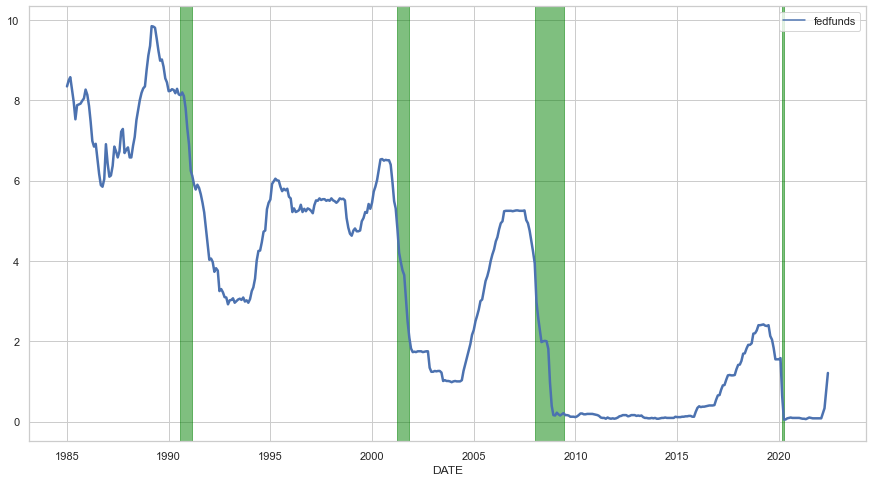

In [17]:
FEDFUNDSRate_df=read_FED_Rate()
plot_ticker_data(FEDFUNDSRate_df, fx_size=15, fy_size=8, color_ = 'black')
FEDFUNDSRate_df.describe(), FEDFUNDSRate_df.head(), FEDFUNDSRate_df.tail()

## retrieve CPI

tic: MEDCPIM158SFRBCLE


(       MEDCPIM158SFRBCLE
 count         450.000000
 mean            2.904248
 std             1.180348
 min            -0.286064
 25%             2.202506
 50%             2.763044
 75%             3.435887
 max             9.130538,
             MEDCPIM158SFRBCLE
 DATE                         
 1985-01-01           3.074903
 1985-02-01           5.603398
 1985-03-01           4.714338
 1985-04-01           4.493616
 1985-05-01           3.307093,
             MEDCPIM158SFRBCLE
 DATE                         
 2022-02-01           6.506399
 2022-03-01           5.902594
 2022-04-01           6.527993
 2022-05-01           7.211770
 2022-06-01           9.130538)

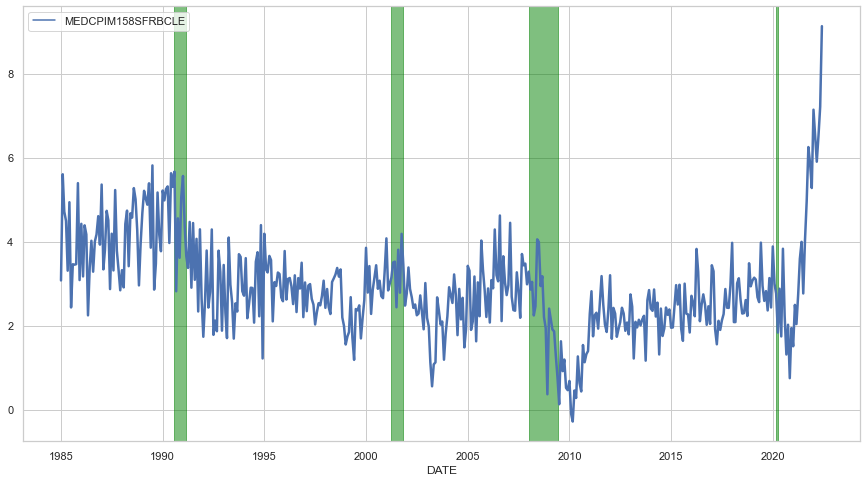

In [51]:
CPI_df=read_CPI()

plot_ticker_data(CPI_df, fx_size=15, fy_size=8, color_ = 'red')
CPI_df.describe(), CPI_df.head(), CPI_df.tail()

## groupby-month rolling CPI

In [19]:
CPI_df=read_CPI()
CPI_df,count=groupby_month(CPI_df)
CPI_df.describe(), CPI_df.head(), CPI_df.tail()


tic: MEDCPIM158SFRBCLE


(       MEDCPIM158SFRBCLE
 count         450.000000
 mean            2.904248
 std             1.180348
 min            -0.286064
 25%             2.202506
 50%             2.763044
 75%             3.435887
 max             9.130538,
             MEDCPIM158SFRBCLE
 DATE                         
 1985-01-31           3.074903
 1985-02-28           5.603398
 1985-03-31           4.714338
 1985-04-30           4.493616
 1985-05-31           3.307093,
             MEDCPIM158SFRBCLE
 DATE                         
 2022-02-28           6.506399
 2022-03-31           5.902594
 2022-04-30           6.527993
 2022-05-31           7.211770
 2022-06-30           9.130538)

tic: MEDCPIM158SFRBCLE


(       MEDCPIM158SFRBCLE
 count         450.000000
 mean            2.904248
 std             1.180348
 min            -0.286064
 25%             2.202506
 50%             2.763044
 75%             3.435887
 max             9.130538,
             MEDCPIM158SFRBCLE
 DATE                         
 1985-01-31           3.074903
 1985-02-28           5.603398
 1985-03-31           4.714338
 1985-04-30           4.493616
 1985-05-31           3.307093,
             MEDCPIM158SFRBCLE
 DATE                         
 2022-02-28           6.506399
 2022-03-31           5.902594
 2022-04-30           6.527993
 2022-05-31           7.211770
 2022-06-30           9.130538)

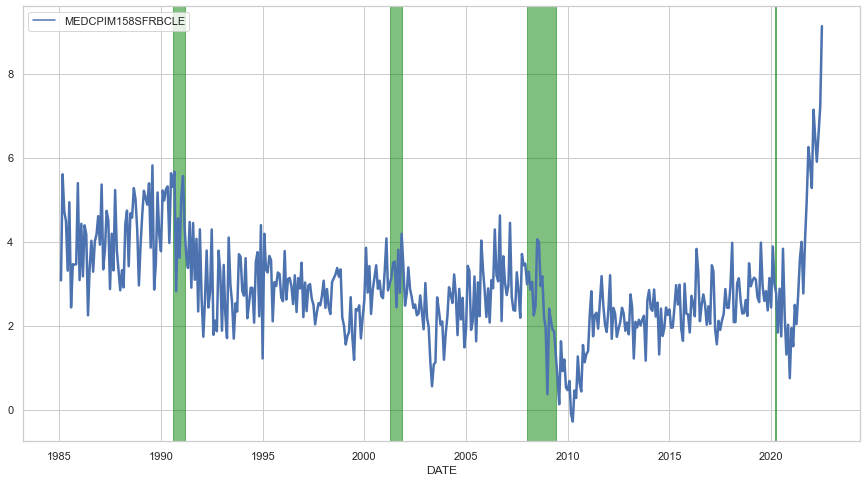

In [20]:
CPI_df=read_CPI()
#CPI_df.loc[pd.to_datetime('2022-06-01')] = [7.8]
CPI_df, dummy=groupby_month(CPI_df)
plot_ticker_data(CPI_df, fx_size=15, fy_size=8, color_ = 'green')
CPI_df.describe(), CPI_df.head(), CPI_df.tail()

## coor cpi fedrate

In [21]:
CPI_df.columns,FEDFUNDSRate_df.columns

(Index(['MEDCPIM158SFRBCLE'], dtype='object'),
 Index(['fedfunds'], dtype='object'))

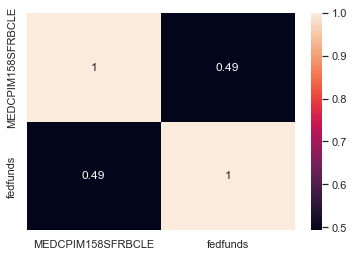

<AxesSubplot:>

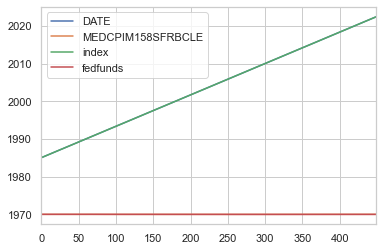

In [26]:
hm,ttp,dummy =index_correlation(CPI_df,FEDFUNDSRate_df)


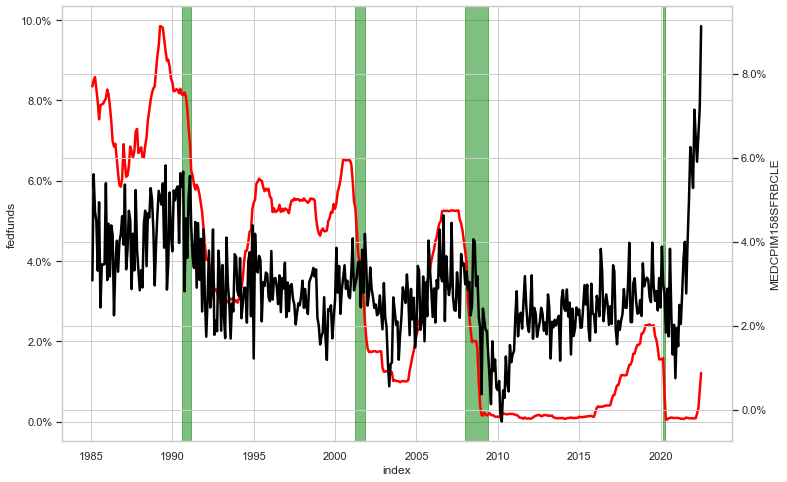

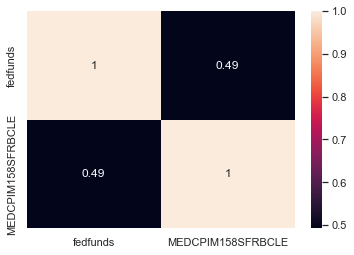

shift: 0    corr: 0.4922787984074044
shift: 0    corr: 0.4922787984074044


In [36]:
maxsh = 0
maxcorr = 0.0
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(FEDFUNDSRate_df, CPI_df, shift__= sh, 
                            bottom_year='1985-1-01',
                            top_year='2027-12-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

## retreive recession

tic: USREC


(            USREC
 count  450.000000
 mean     0.080000
 std      0.271595
 min      0.000000
 25%      0.000000
 50%      0.000000
 75%      0.000000
 max      1.000000,
             USREC      index
 DATE                        
 1985-01-01      0 1985-01-01
 1985-02-01      0 1985-02-01,
             USREC      index
 DATE                        
 2022-05-01      0 2022-05-01
 2022-06-01      0 2022-06-01)

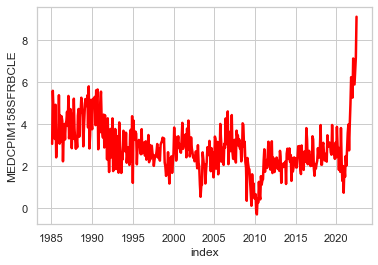

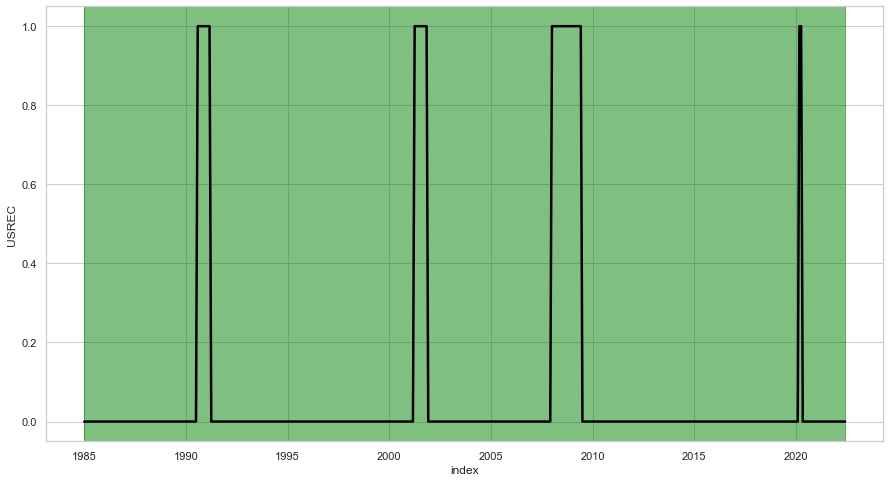

In [23]:
Recession_df = read_Recession()
Recession_df.describe(),Recession_df.head(n=2), Recession_df.tail(n=2)

In [24]:
def Recessions_plot(ax, start_date, end_date):
    ticker = 'USREC'
    rd_type = 'fred'
    Recession_df = DataReader(ticker, rd_type, 
                            start = start_date, end = end_date) 

    Recession_df['index']= Recession_df.index
    threshold = 0
    ax.fill_between(Recession_df['index'], 0, 1, where=Recession_df[Recession_df.columns[0]] > threshold,
                    color='green', alpha=0.5, transform=ax.get_xaxis_transform())
    return(1)


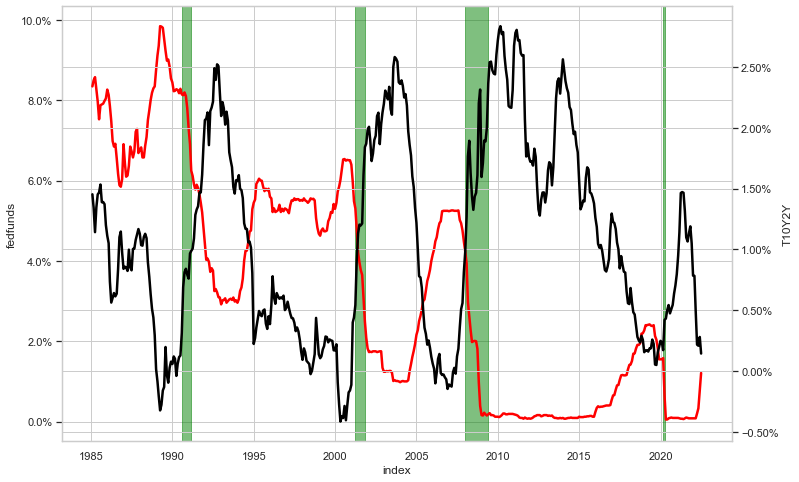

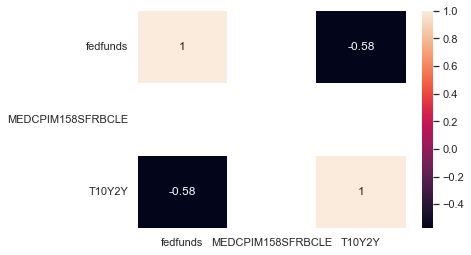

shift: 0    corr: nan
shift: 0    corr: 0.0


In [38]:
maxsh = 0
maxcorr = 0.0
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(FEDFUNDSRate_df, by_df, shift__= sh, 
                            bottom_year='1985-1-01',
                            top_year='2027-12-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

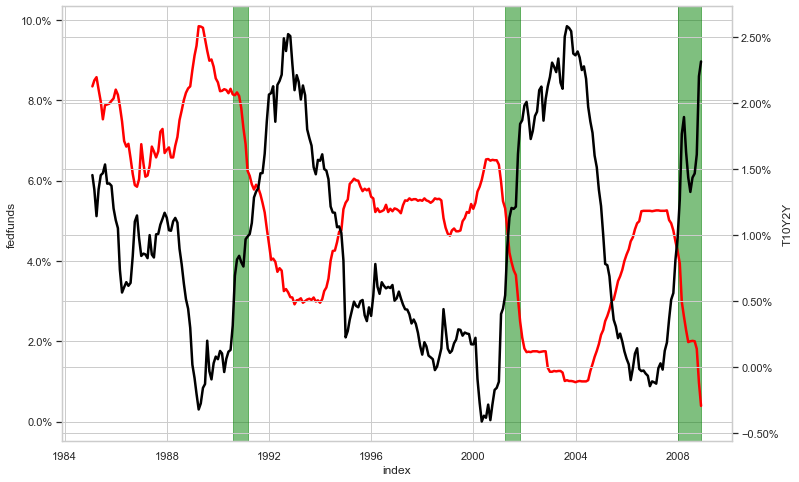

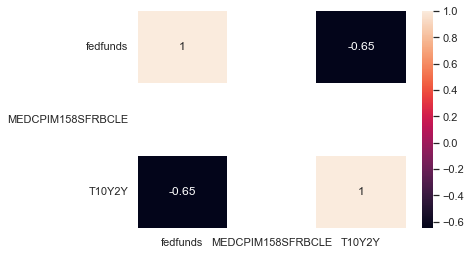

shift: 0    corr: nan
shift: 0    corr: 0.0


In [39]:
maxsh = 0
maxcorr = 0.0
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(FEDFUNDSRate_df, by_df, shift__= sh, 
                            bottom_year='1985-1-01',
                            top_year='2008-12-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

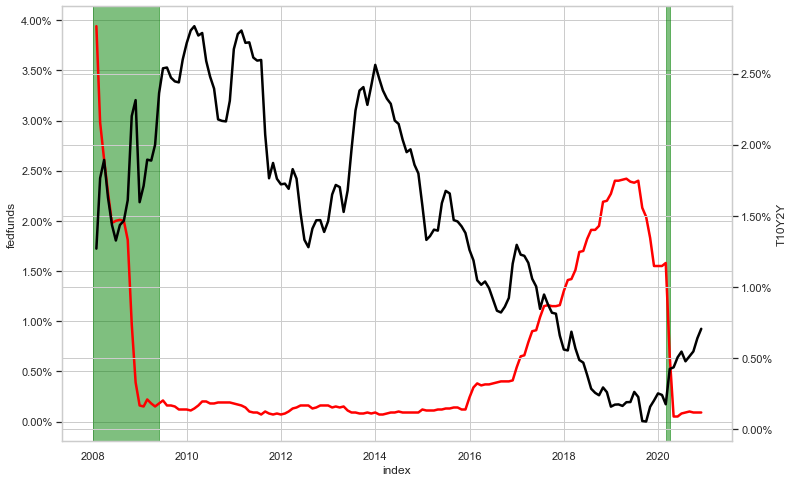

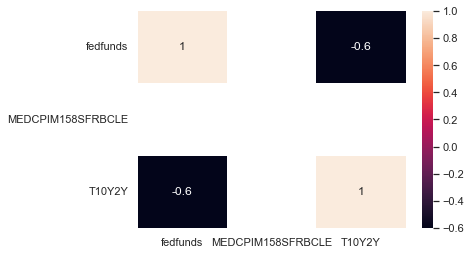

shift: 0    corr: nan
shift: 0    corr: 0.0


In [40]:
maxsh = 0
maxcorr = 0.0
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(FEDFUNDSRate_df, by_df, shift__= sh, 
                            bottom_year='2008-1-01',
                            top_year='2020-12-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

## Retrieve Brave-Butters-Kelley Cycle Component of GDP 

Earlier this year, a new “big data” activity index was introduced in an Economic Perspectives article.1 This index was constructed from 500 monthly measures of growth in U.S. economic activity and quarterly U.S. real GDP growth. To recap that work, the authors developed what is referred to as a mixed-frequency collapsed dynamic factor model2 that allowed for the estimation of the unobserved monthly evolution of quarterly U.S. real GDP growth based on the variation in a panel of 500 monthly time series. Included in this panel were the coincident, leading, and lagging monthly real activity indicators commonly used to assess the state of the business cycle for the United States. Using this model, the authors then decomposed monthly real GDP growth into three separate components: trend, cycle, and irregular components. The big data activity index represented the cycle component of this decomposition and was shown to have several highly desirable properties, including being 99% accurate in aligning with historical U.S. recessions and expansions as defined by the National Bureau of Economic Research (NBER) since 1960.3

tic: BBKMCY


(           BBKMCY
 count  450.000000
 mean    -0.310894
 std      3.135826
 min    -38.771433
 25%     -0.900554
 50%      0.013773
 75%      1.005218
 max     10.715806,
               BBKMCY
 DATE                
 1985-01-31 -0.664751
 1985-02-28  0.183190
 1985-03-31  1.142127
 1985-04-30 -0.195582
 1985-05-31  0.445028,
               BBKMCY
 DATE                
 2022-02-28  0.419364
 2022-03-31  0.836047
 2022-04-30 -0.229555
 2022-05-31 -0.595858
 2022-06-30 -1.000000)

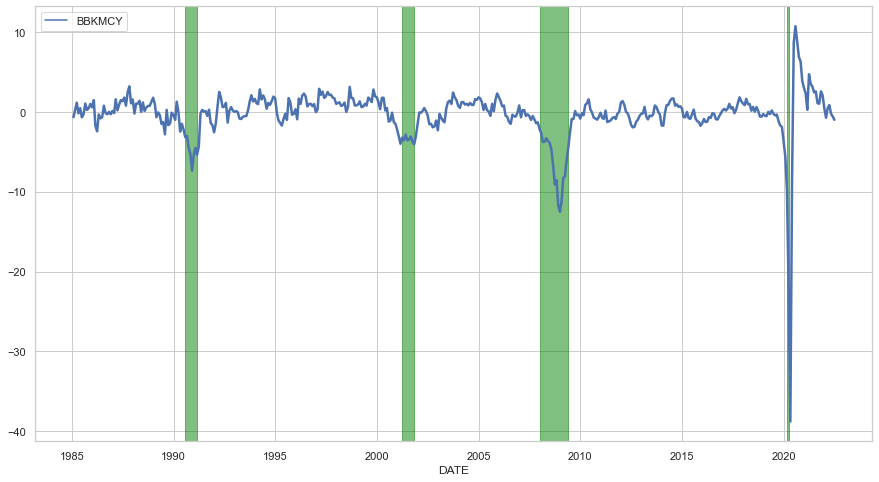

In [52]:
BBKMCY_df=read_ticker_data(ticker='BBKMCY')
BBKMCY_df.loc[pd.to_datetime('2022-06-01')] = [-1.0]
BBKMCY_df,count=groupby_month(BBKMCY_df)

plot_ticker_data(BBKMCY_df, fx_size=15, fy_size=8, color_ = 'green')
BBKMCY_df.describe(), BBKMCY_df.head(), BBKMCY_df.tail()


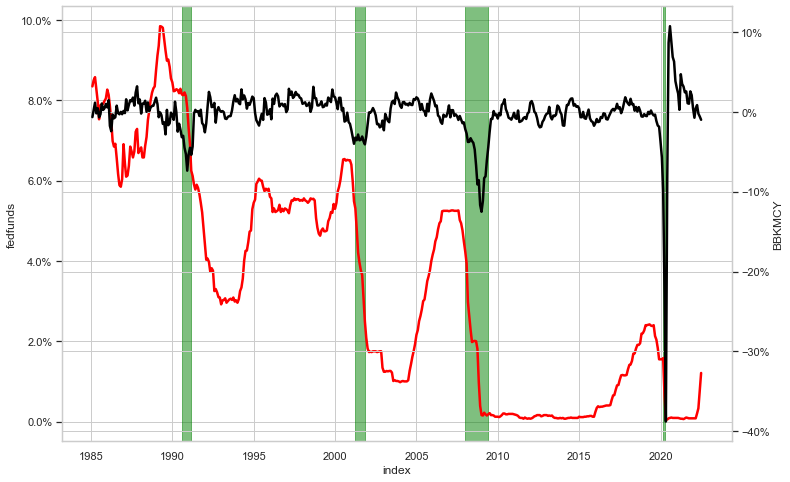

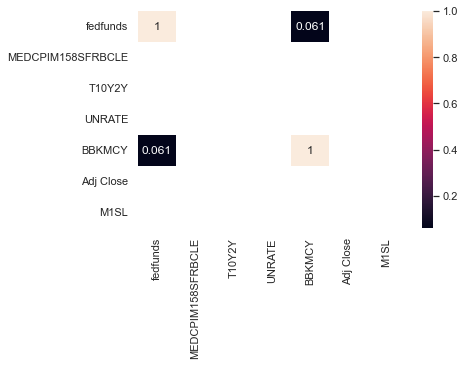

shift: 0    corr: nan
shift: 0    corr: 0.0


In [108]:
maxsh = 0
maxcorr = 0.0
for sh in range(0, 3, 3):
    unemployment_df[unemployment_df.columns[0]] = unemployment_df[unemployment_df.columns[0]]/2
    hm=Fed_indexes_corr(FEDFUNDSRate_df, BBKMCY_df, shift__= sh, 
                            bottom_year='1985-1-01',
                            top_year='2022-12-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

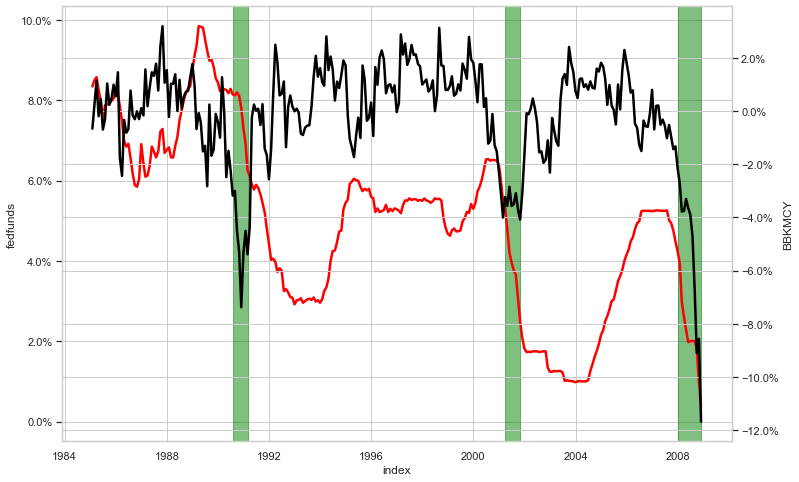

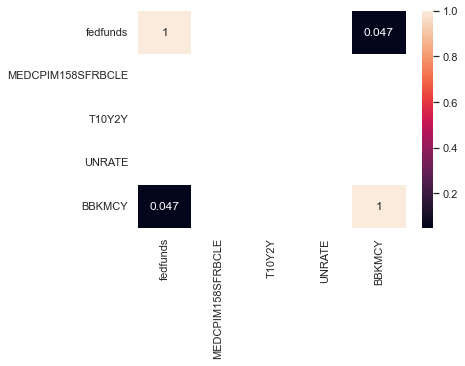

shift: 0    corr: nan
shift: 0    corr: 0.0


In [60]:
maxsh = 0
maxcorr = 0.0
for sh in range(0, 3, 6):

    hm=Fed_indexes_corr(FEDFUNDSRate_df, BBKMCY_df, shift__= sh, 
                            bottom_year='1985-1-01',
                            top_year='2008-12-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

## Retrieve M1 money supply

tic: M1SL


(               M1SL
 count    450.000000
 mean    2624.271556
 std     4166.488660
 min      557.000000
 25%     1075.150000
 50%     1297.500000
 75%     2474.275000
 max    20709.500000,
              M1SL
 DATE             
 1985-01-31  557.0
 1985-02-28  563.6
 1985-03-31  566.6
 1985-04-30  570.4
 1985-05-31  575.1,
                M1SL
 DATE               
 2022-02-28  20666.8
 2022-03-31  20709.5
 2022-04-30  20624.0
 2022-05-31  20632.9
 2022-06-30  20640.0)

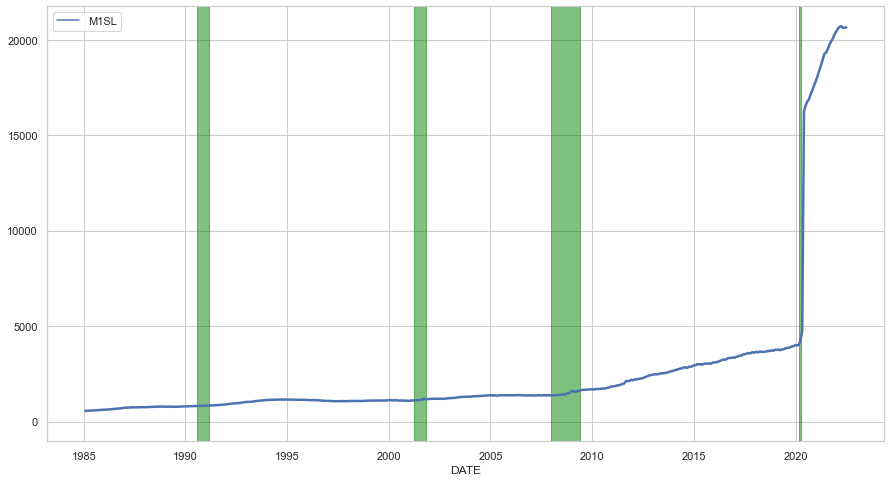

In [109]:
M1_df=read_ticker_data(ticker='M1SL',
                       start_date = '1985/1/01',
                        end_date = '2022/07/30')

M1_df.loc[pd.to_datetime('2022-06-01')] = [20640]
M1_df,count=groupby_month(M1_df)
plot_ticker_data(M1_df, fx_size=15, fy_size=8, color_ = 'green')
M1_df.describe(), M1_df.head(), M1_df.tail()

## Fed rate vs. M1

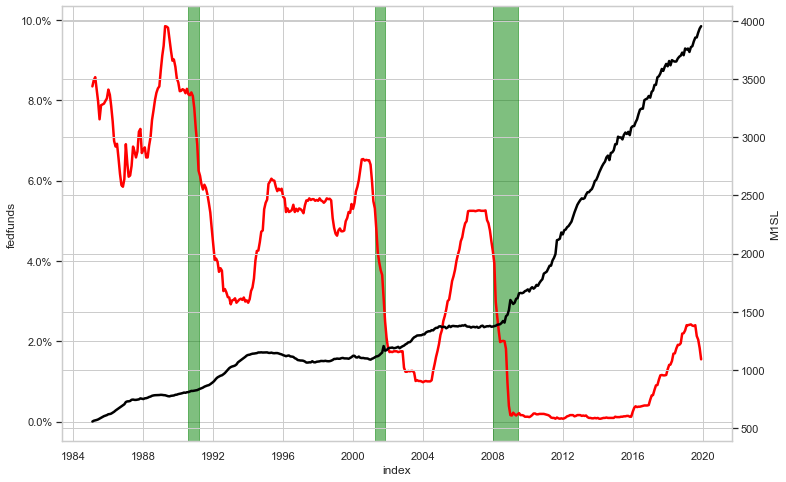

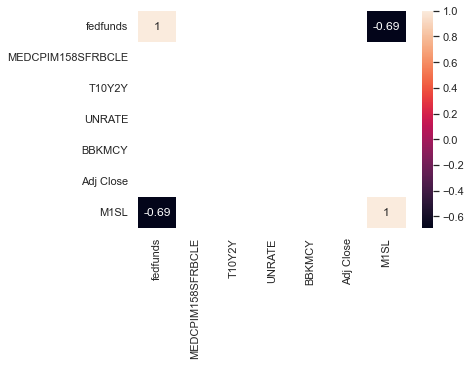

shift: 0    corr: nan
shift: 0    corr: 0.0


In [90]:
maxsh = 0
maxcorr = 0.0
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(FEDFUNDSRate_df, M1_df, shift__= sh, 
                            bottom_year='1985-1-01',
                            top_year='2019-12-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

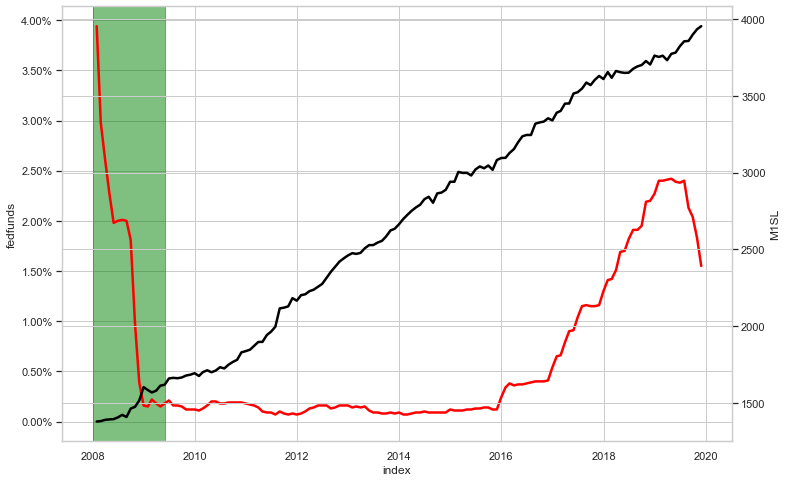

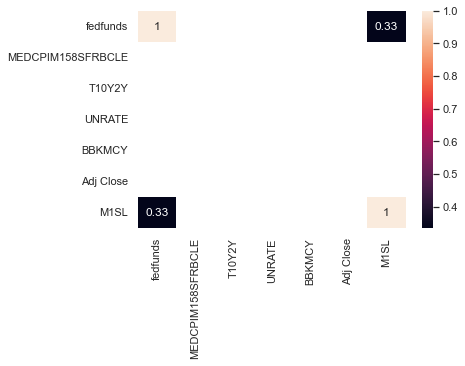

shift: 0    corr: nan
shift: 0    corr: 0.0


In [91]:
maxsh = 0
maxcorr = 0.0
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(FEDFUNDSRate_df, M1_df, shift__= sh, 
                            bottom_year='2008-1-01',
                            top_year='2019-12-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

## BBKMCY_df vs M1

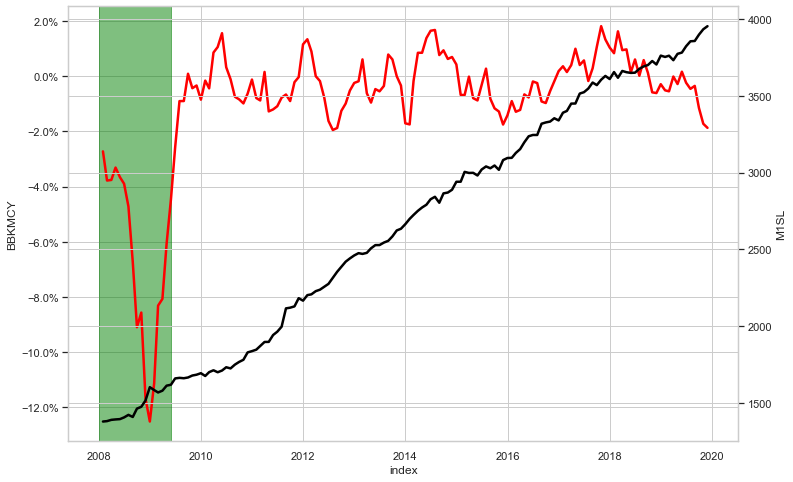

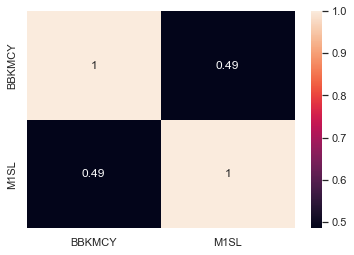

shift: 0    corr: 0.48526899857950734
shift: 0    corr: 0.48526899857950734


In [110]:
maxsh = 0
maxcorr = 0.0
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(BBKMCY_df, M1_df, shift__= sh, 
                            bottom_year='2008-1-01',
                            top_year='2019-12-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

## Retrieve NASDAS composite index IXIC

tic: ^IXIC


(          Adj Close
 count    450.000000
 mean    3023.091092
 std     3215.541907
 min      260.845456
 25%      760.928693
 50%     2071.452342
 75%     3821.121627
 max    15814.932896,
              Adj Close
 Date                  
 1985-01-31  260.845456
 1985-02-28  285.521052
 1985-03-31  280.428574
 1985-04-30  280.895238
 1985-05-31  287.513636,
                Adj Close
 Date                    
 2022-02-28  13898.728413
 2022-03-31  13623.262950
 2022-04-30  13394.163037
 2022-05-31  11829.729539
 2022-06-30  11418.919085)

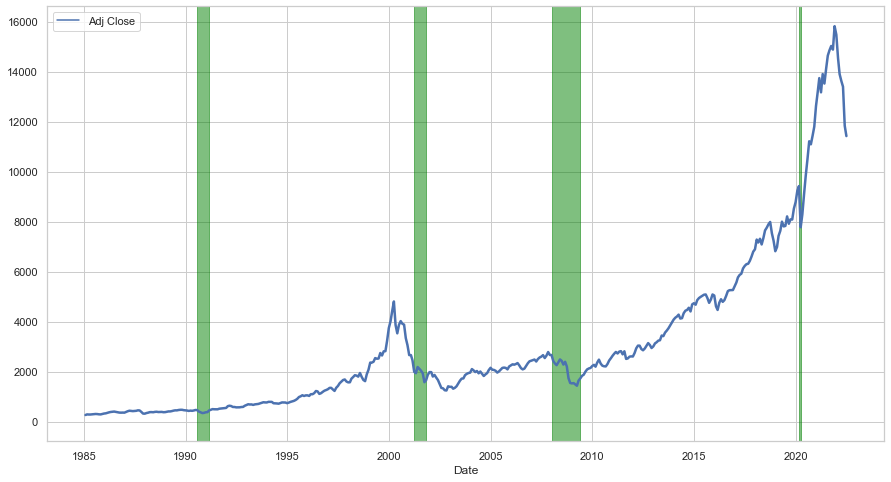

In [111]:
IXIC_df=read_ticker_data(ticker='^IXIC', rd_type='yahoo')
#IXIC_df.loc[pd.to_datetime('2022-06-01')] = [-1.0]
IXIC_df,dummy=groupby_month(IXIC_df)
IXIC_df=rolling_12_month(IXIC_df)
IXIC_df =  IXIC_df.iloc[:-1] # drop last month if not edof month
IXIC_df.drop(['High', 'Low','Open', 'Close', 'Volume'], axis=1, inplace=True)
plot_ticker_data(IXIC_df, fx_size=15, fy_size=8, color_ = 'green')

IXIC_df.describe(), IXIC_df.head(), IXIC_df.tail()

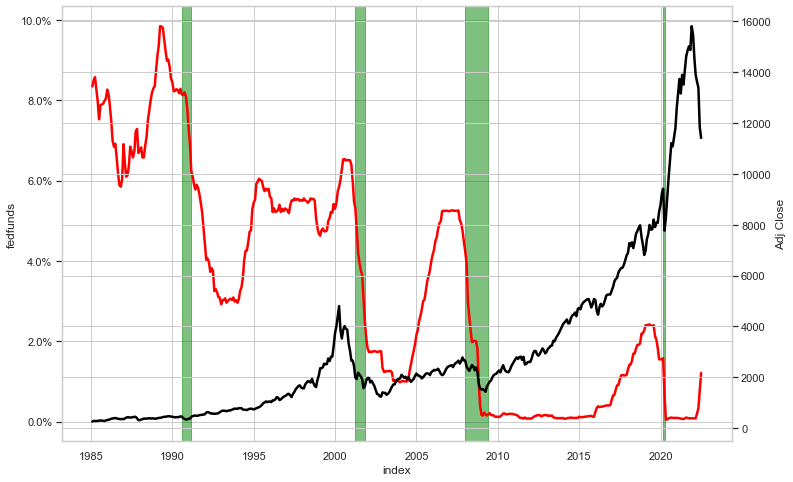

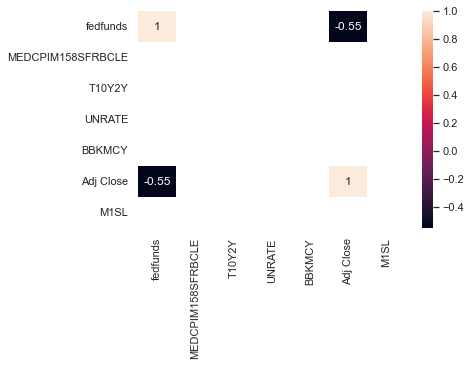

shift: 0    corr: nan
shift: 0    corr: 0.0


In [93]:
maxsh = 0
maxcorr = 0.0
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(FEDFUNDSRate_df, IXIC_df, shift__= sh, 
                            bottom_year='1985-1-01',
                            top_year='2022-12-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

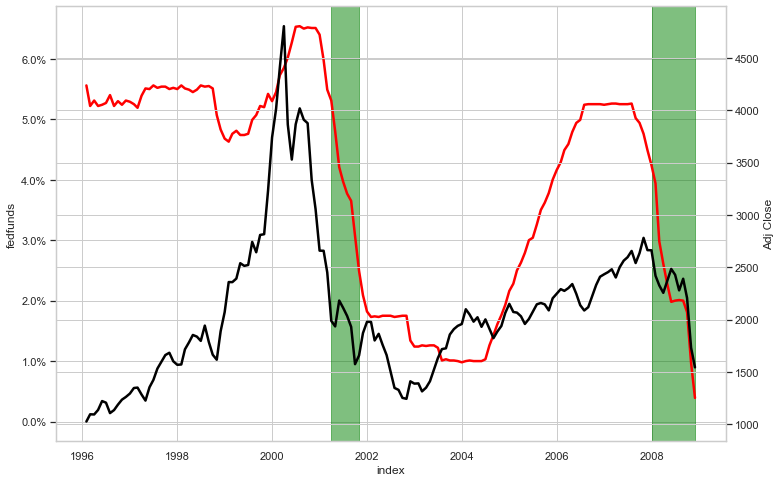

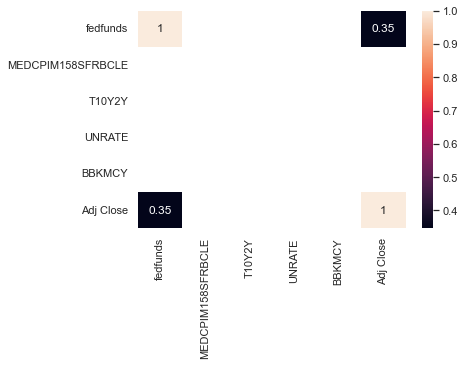

shift: 0    corr: nan


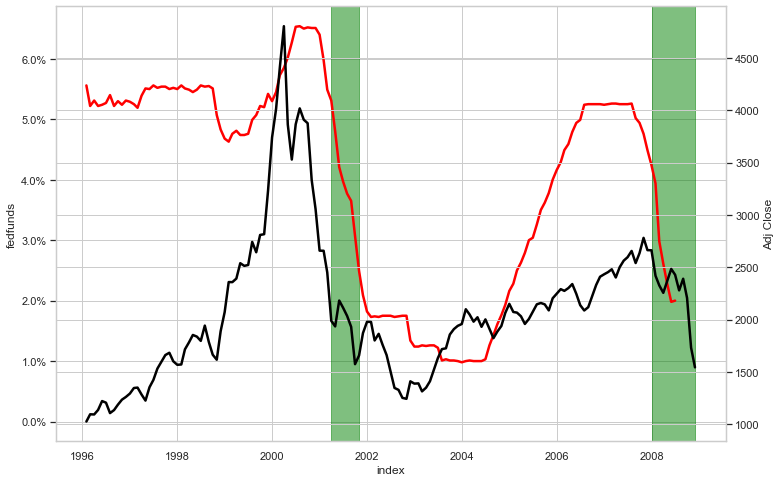

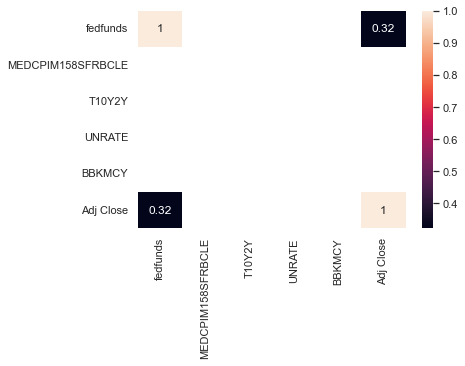

shift: 5    corr: nan


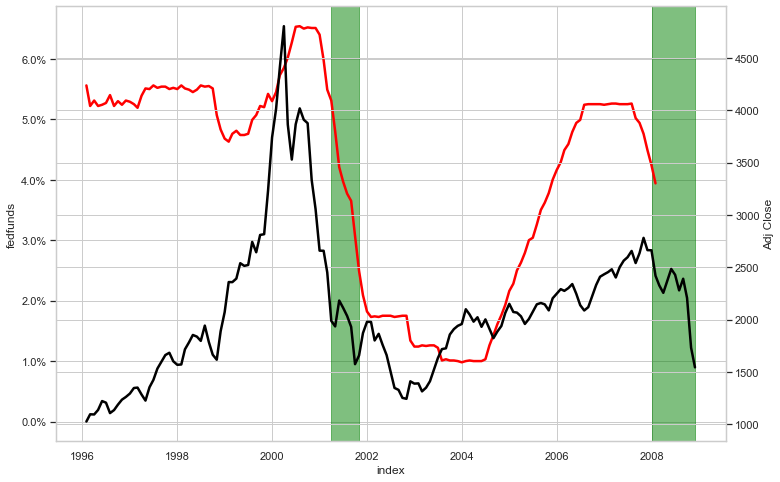

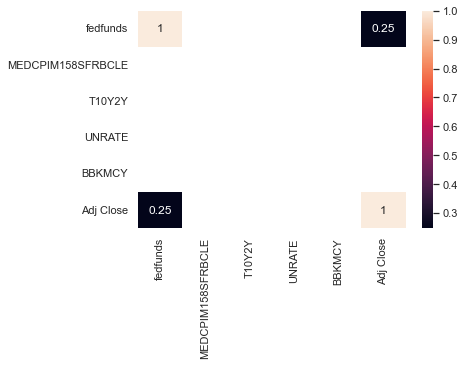

shift: 10    corr: nan


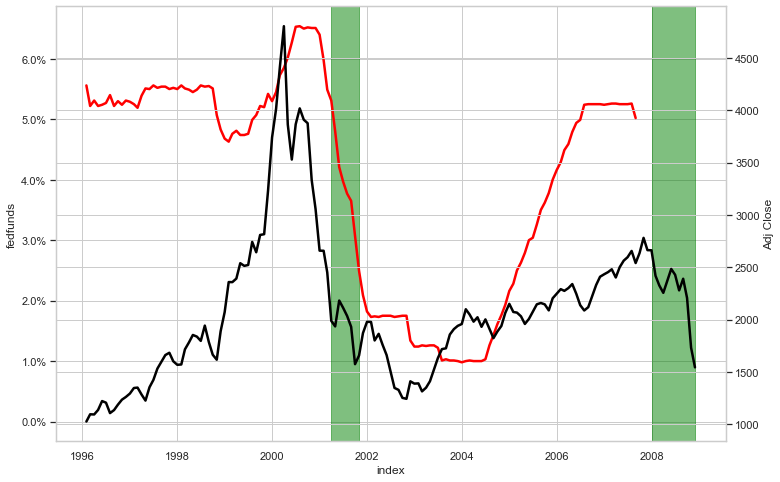

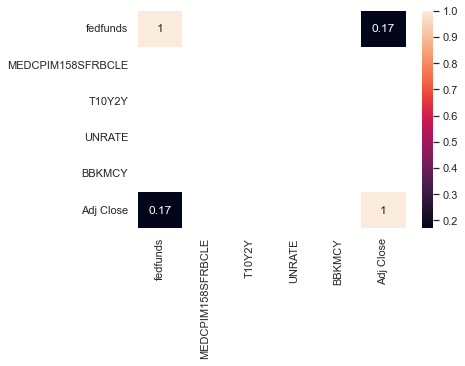

shift: 15    corr: nan


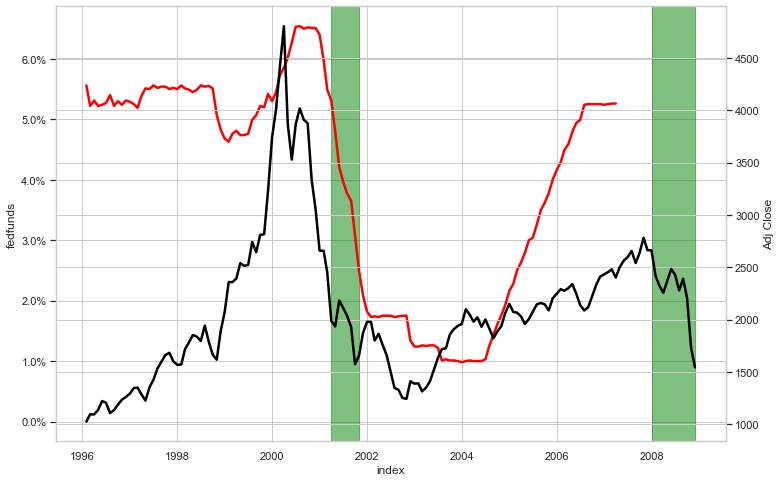

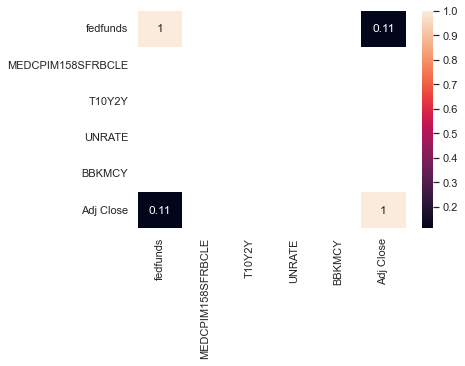

shift: 20    corr: nan


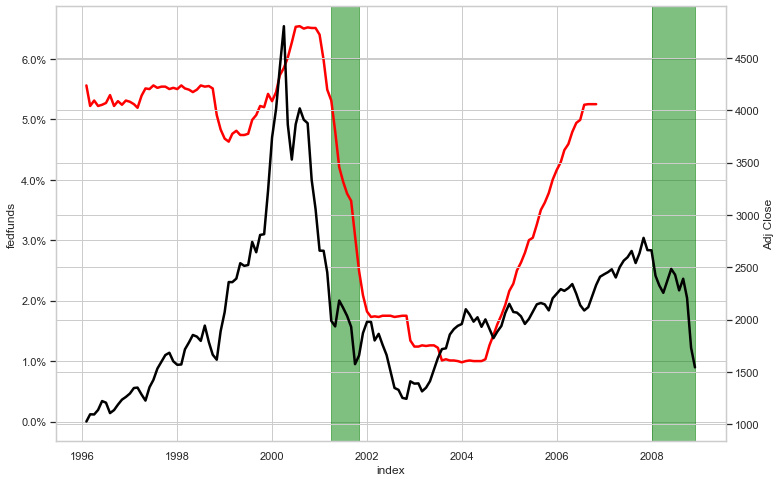

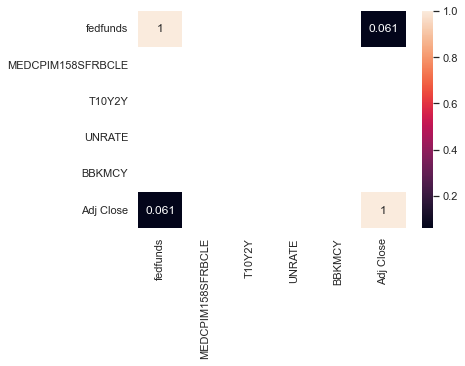

shift: 25    corr: nan


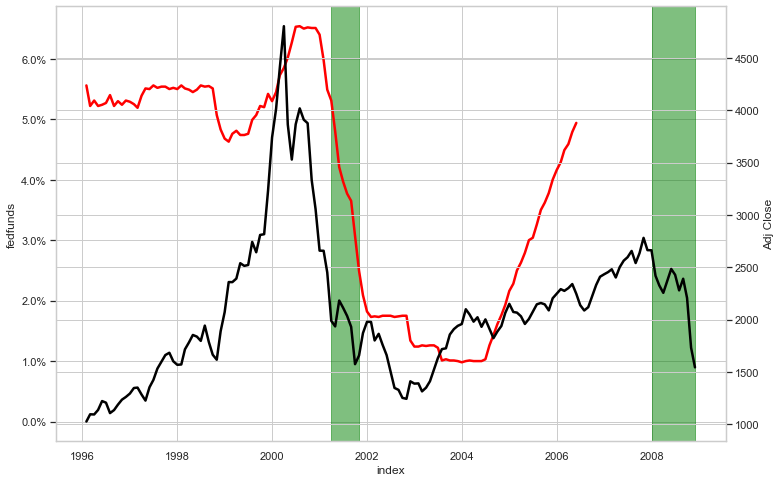

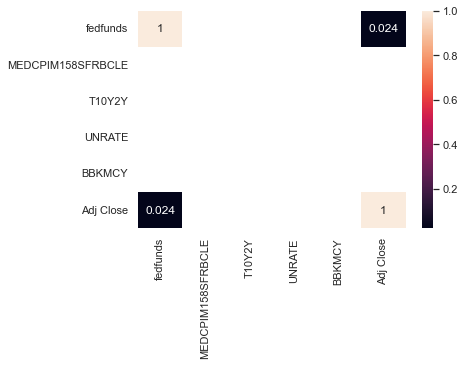

shift: 30    corr: nan


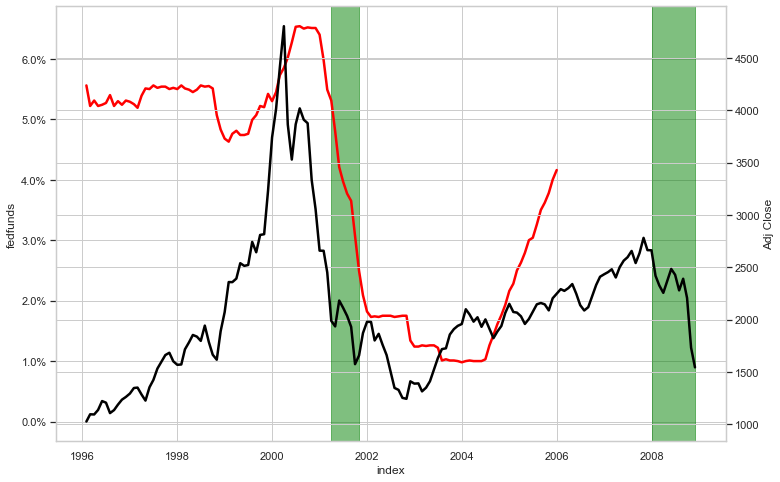

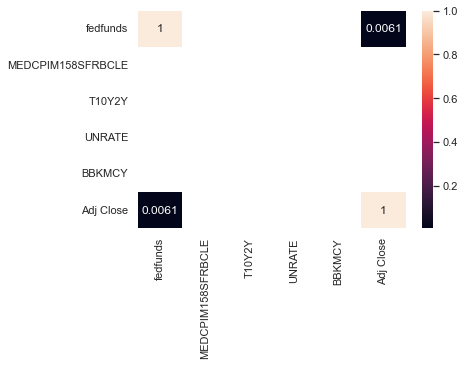

shift: 35    corr: nan
shift: 0    corr: 0.0


In [65]:
maxsh = 0
maxcorr = 0.0
for sh in range(0, 37, 5):
    hm=Fed_indexes_corr(FEDFUNDSRate_df, IXIC_df, shift__= sh, 
                            bottom_year='1996-1-01',
                            top_year='2008-12-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)

## M1 vs NASDAQ

In [107]:
M1_df.describe(), IXIC_df.describe() ,M1_df, IXIC_df,

(        M1SL  Adj Close
 count  449.0      449.0
 mean     0.0        0.0
 std      0.0        0.0
 min      0.0        0.0
 25%      0.0        0.0
 50%      0.0        0.0
 75%      0.0        0.0
 max      0.0        0.0,
           Adj Close
 count    450.000000
 mean    3023.091092
 std     3215.541907
 min      260.845456
 25%      760.928693
 50%     2071.452342
 75%     3821.121627
 max    15814.932896,
             M1SL      index  Adj Close
 DATE                                  
 1985-01-31     0 1985-01-31          0
 1985-02-28     0 1985-02-28          0
 1985-03-31     0 1985-03-31          0
 1985-04-30     0 1985-04-30          0
 1985-05-31     0 1985-05-31          0
 1985-06-30     0 1985-06-30          0
 1985-07-31     0 1985-07-31          0
 1985-08-31     0 1985-08-31          0
 1985-09-30     0 1985-09-30          0
 1985-10-31     0 1985-10-31          0
 1985-11-30     0 1985-11-30          0
 1985-12-31     0 1985-12-31          0
 1986-01-31     0 1986-0

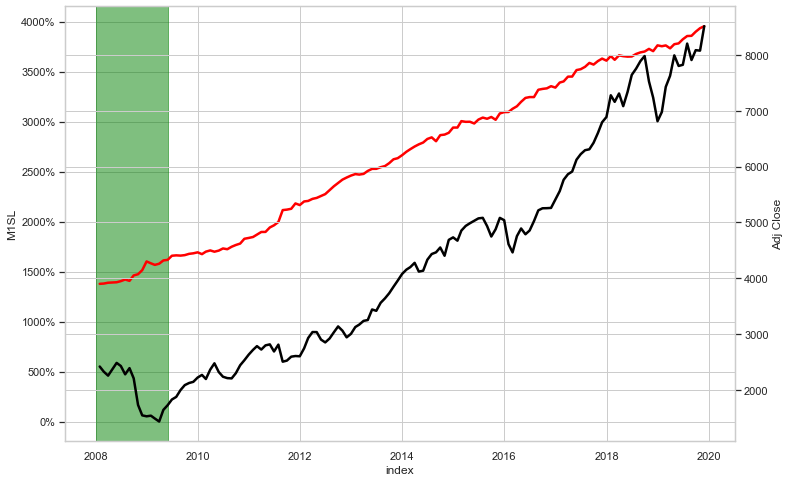

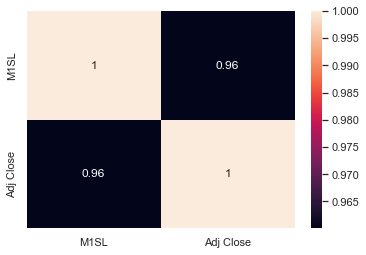

shift: 0    corr: 0.9600613070313762
shift: 0    corr: 0.9600613070313762


In [112]:
maxsh = 0
maxcorr = 0.0
 # delete june 
for sh in range(0, 3, 3):
    hm=Fed_indexes_corr(M1_df, IXIC_df, shift__= sh, 
                            bottom_year='2008-1-01',
                            top_year='2019-12-01')
    print('shift:', sh, '   corr:', hm.iloc[0,1])
    if hm.iloc[0,1] > maxcorr: 
        maxcorr = hm.iloc[0,1]
        maxsh = sh
print('shift:', maxsh, '   corr:',maxcorr)